In [19]:
# Name: Nazrin
# Surname: Abdinli
# ID: 150220925

In [20]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# Do not include any other libraries!!!

## Skewness [15 pts]

In this part, you will calculate the skewness value of a skewed normal distribution. First, let's plot the histogram of the distribution:

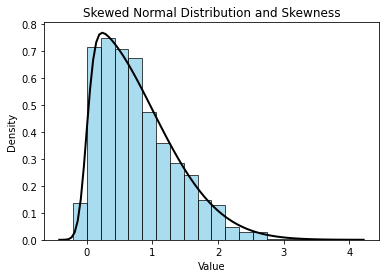

In [21]:
np.random.seed(42)

# Generate a random sample from a skewed normal distribution
skewness_parameter = 10
sample_size = 1000
data_skewed = stats.skewnorm.rvs(a=skewness_parameter, size=sample_size)

# Plot the histogram of the skewed data
plt.hist(data_skewed, bins=20, density=True, color='skyblue', edgecolor='black', alpha=0.7)

# Plot the theoretical distribution for comparison
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.skewnorm.pdf(x, skewness_parameter)
plt.plot(x, p, 'k', linewidth=2)

# Add labels
plt.title("Skewed Normal Distribution and Skewness")
plt.xlabel("Value")
plt.ylabel("Density")

# Show the plot
plt.show()

The sample skewness is computed as the Fisher-Pearson coefficient of skewness, i.e.

\begin{align*}
g_1 &= \frac{m_{3}}{m^{3/2}_2} \\
\end{align*}

where

\begin{align*}
m_i &= \tfrac{1}{N}\sum_{n=1}^{N}(x[n]-\bar{x})^{i} \\
\end{align*}

is the biased sample $i$th central moment, $\bar{x}$ is the sample mean, and $N$ is the sample size. For an unbiased result, the calculations are corrected for bias and the value computed is the adjusted Fisher-Pearson standardized moment coefficient, i.e.


\begin{align*}
G_{1} &= \frac{k_3}{k_2^{3/2}} = \frac{\sqrt{N(N-1)}}{N-2}\frac{m_3}{m_2^{3/2}} \\
\end{align*}

**[5 pts]** Now implement the **calculate_skewness()** function by using $G_1$ above.

In [22]:
def calculate_skewness(data):
    """
    Args:
        data (numpy.ndarray): A skewed normal distribution.
    Returns:
        int: Skeweness value of the input distribution.
    """
    #######    CODE HERE    #######
    N = len(data)               #determining the number of data points
    mean = np.mean(data)        #calculating the mean
    m2 = np.sum((data - mean) ** 2) / N     #calculating the second central moment
    m3 = np.sum((data - mean) ** 3) / N     #calculating the third central moment

    #calculating the numerators and denominators for the skewness formula
    numerator_1 = np.sqrt(N * (N - 1))      
    denominator_1 = (N - 2)                 
    numerator_2 = m3
    denominator_2 = np.power(m2, 3/2)

    #calculating the skewness value using Fisher-Pearson coefficient formula
    skewness = (numerator_1/denominator_1) * (numerator_2/denominator_2)
    return skewness
    
    #######    CODE HERE    #######

In [23]:
# Your calculation
est_skewness = calculate_skewness(data_skewed)

# Library call
true_skewness = stats.skew(data_skewed, bias=False)

print(est_skewness, true_skewness)

1.007654064120593 1.0076540641205929


In [24]:
#Check if your implementation is correct
assert round(est_skewness, 5) == round(true_skewness, 5), \
    f"Skewness value is wrong \n Your calculation: {round(est_skewness, 5)} \n \
    True Value: {round(true_skewness, 5)}"
print("Your calculation is correct!")

Your calculation is correct!


**[5 pts]** Find the **mean and median** values of the distribution. Plot the distribution and highlight mean and median values on the graph.

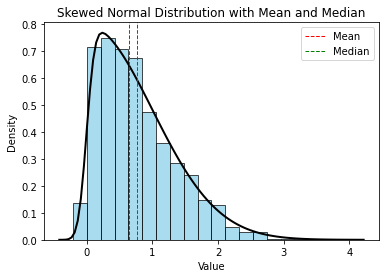

Mean value: 0.7719211854654121
Median value: 0.651420257427958


In [25]:
#######    CODE HERE    #######
#given data
np.random.seed(42)
sample_size = 1000
param_skewness = 10
skewed_data = stats.skewnorm.rvs(a=param_skewness, size=sample_size)

#calculating mean and median
mean_skewed = np.mean(data_skewed)
median_skewed = np.median(data_skewed)

#plotting the histogram of the skewed data
plt.hist(skewed_data, bins=20, density=True, color='skyblue', edgecolor='black', alpha=0.7)

#plotting the theoretical distribution 
x_min, x_max = plt.xlim()
x_line = np.linspace(x_min, x_max, 100)
pdf = stats.skewnorm.pdf(x_line, param_skewness)
plt.plot(x_line, pdf, 'k', linewidth=2)

#designing plot
plt.axvline(mean_skewed, color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(median_skewed, color='green', linestyle='dashed', linewidth=1, label='Median')

plt.title("Skewed Normal Distribution with Mean and Median")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.show()

#displaying the calculated mean and median values
print(f"Mean value: {mean_skewed}")
print(f"Median value: {median_skewed}")

#######    CODE HERE    #######

**[5 pts]** What does this skewness coefficient you found mean? Explain this using the relationship between the mean and median of the distribution.

**Answer:** 

Positive skewness: mean > median (right-skewed)

Negative skewness: mean < median (left-skewed)

Skewness close to zero: mean ≈ median (approximately symmetric distribution)

When a set of numbers has a positive skewness, it means that most of the numbers are clustered on the left side, 
and there are a few very large values pulling the mean higher than the median.

Conversely, if there's a negative skewness, it indicates that most numbers are on the right side,
with a few very small values dragging the mean lower than the median.

When the skewness is close to zero, it means that the numbers are fairly spread out and balanced,
so the mean and the median are roughly around the same point. 
This suggests a more symmetric distribution without a noticeable leaning towards either larger or smaller values.

## Central Limit Theorem

In this part, you will do repeated experiments to see the effect of the **Central Limit Theorem**. For each
experiment you will roll a fair die for 'num_rolls' times. Also you will repeat this experiment for 'num_experiments' times. Then you need to repeat this process and plot the distributions for
each value in 'num_rolls' list.

**[5 pts]** For this first code section, you will get the **sum** of the dice rolled for each experiment.

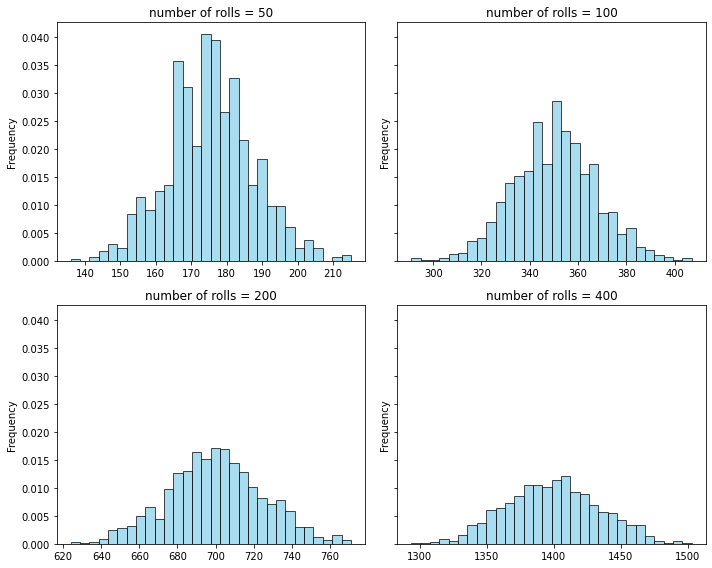

In [26]:
# Number of dice rolls for each experiment
num_rolls = [50, 100, 200, 400]

# Number of experiments
num_experiments = 1000

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8), sharey=True)

# Flatten the axes array to simplify indexing in the loop
axes = axes.flatten()

for i, ax in enumerate(axes):
    np.random.seed(42)

    #######    CODE HERE    #######
    sum_dice_rolls = []
    for _ in range(num_experiments):
        dice_rolls = np.random.randint(1, 7, size=num_rolls[i])     #simulating dice rolls 
        sum_dice_rolls.append(np.sum(dice_rolls))                   #calculating the sum
    
    #plotting histogram 
    ax.hist(sum_dice_rolls, bins=30, density=True, color='skyblue', edgecolor='black', alpha=0.7)
    ax.set_title(f'number of rolls = {num_rolls[i]}')
    ax.set_ylabel('Frequency')

    #######    CODE HERE    #######
    
# Adjust layout to prevent subplot titles from overlapping
plt.tight_layout()

# Show the plot
plt.show()

**[5 pts]** And for this code section, you will get the **average** of the dice rolled for each experiment.

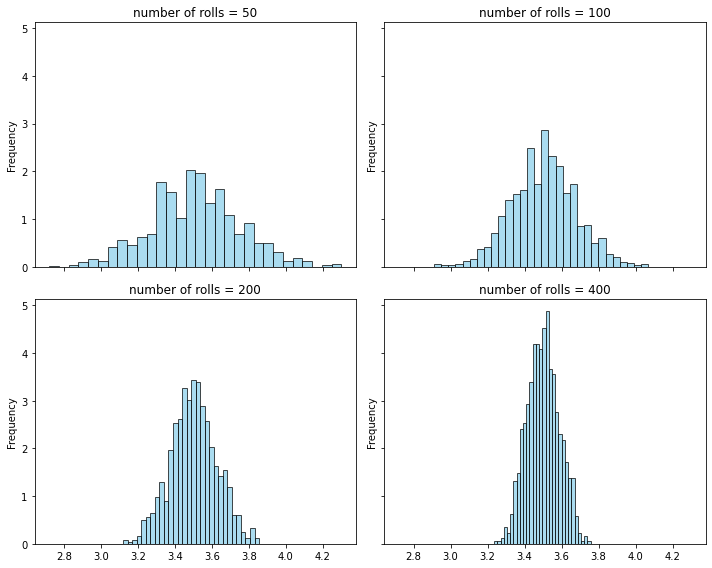

In [27]:
# Number of dice rolls for each experiment
num_rolls = [50, 100, 200, 400]

# Number of experiments
num_experiments = 1000

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8), sharex=True, sharey=True)

# Flatten the axes array to simplify indexing in the loop
axes = axes.flatten()

for i, ax in enumerate(axes):
    #######    CODE HERE    #######
    np.random.seed(42)
    average_dice_rolls = []
    
    for _ in range(num_experiments):
        dice_rolls = np.random.randint(1, 7, size=num_rolls[i])     #simulating dice rolls
        average_dice_rolls.append(np.mean(dice_rolls))              #calculating the average

    #plotting histogram for the current number of rolls
    ax.hist(average_dice_rolls, bins=30, density=True, color='skyblue', edgecolor='black', alpha=0.7)
    ax.set_title(f'number of rolls = {num_rolls[i]}')
    ax.set_ylabel('Frequency')
    
    #######    CODE HERE    #######

# Adjust layout to prevent subplot titles from overlapping
plt.tight_layout()

# Show the plot
plt.show()

The resulting plots should look like these:
![Plot1](images/sum.png)
![Plot2](images/avg.png)

As you see in the graphs, even thoug our initial distribution (rolling a dice) is **uniform**, the resulting distributions are **normal**. This is the effect of **the Central Limit Theorem**.

**[5 pts]** As we increase the number of rolls for each experiment, the distribution becomes flatter when we get the sum of the numbers. However, when averaging the numbers, the distribution becomes sharper. Why?

**Answer:** 

When you increase the number of the dice rolls, you're effectively increasing the range of the sum of possible outcomes. For example, when you use a single dice roll, you can get the sum outcomes from 1 to 6. As you incline the number of rolls in an experiment, the possible range of the sum grows accordingly.

When you average the outcomes of the dice rolls, the averaging process tends to reduce the variability. The reduction in variability happens because when you take the average of several values, the influence of extreme values decreases, particularly as the sample size gets larger. As a result, the range of average values becomes narrower and more closely centered around the anticipated mean.